In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Three examples of continuous variables: 
- SalePrice: the property's sale price in dollars.
- LotArea: Lot size in square feet
- YearBuilt: Original construction date

Three examples of categorical variables: 
- Street: Type of road access
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


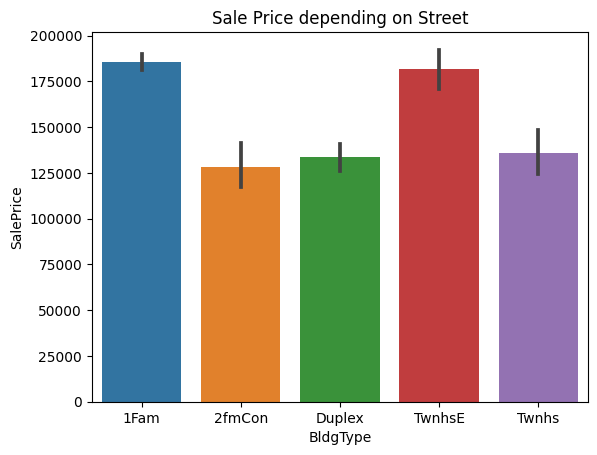

In [3]:
sns.barplot(x = train_df['BldgType'], y = train_df['SalePrice'], data = train_df)
plt.title("Sale Price depending on Street")
plt.show()

Dealing with missing values (NaN values)

Finding NA columns / Handling datas & check

In [4]:
train_pre = train_df.copy()

col_na = train_pre.columns[train_pre.isna().any()].tolist()

print(f'Total columns with na data: {len(col_na)} columns {col_na}')

num_dropped = 0 # Initialize a variable to count the dropped columns

for col in train_df.columns:
    if col in col_na:
        train_pre.drop(columns=col, inplace=True)
        num_dropped += 1
        print(f'Dropped columns: {col}')

print(f'Total dropped columns: {num_dropped} columns')

Total columns with na data: 19 columns ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Dropped columns: LotFrontage
Dropped columns: Alley
Dropped columns: MasVnrType
Dropped columns: MasVnrArea
Dropped columns: BsmtQual
Dropped columns: BsmtCond
Dropped columns: BsmtExposure
Dropped columns: BsmtFinType1
Dropped columns: BsmtFinType2
Dropped columns: Electrical
Dropped columns: FireplaceQu
Dropped columns: GarageType
Dropped columns: GarageYrBlt
Dropped columns: GarageFinish
Dropped columns: GarageQual
Dropped columns: GarageCond
Dropped columns: PoolQC
Dropped columns: Fence
Dropped columns: MiscFeature
Total dropped columns: 19 columns


Finding numerical columns

In [5]:
numerical_val = np.array(train_pre.select_dtypes(include=['int64', 'float64']).columns)
numerical_val

array(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype=object)

Normalizaing numerical columns by standardization

In [6]:
from sklearn.preprocessing import StandardScaler

# Exclude the last column (SalePrice)
numerical_val = numerical_val[:-1]
numerical_val

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform each column separately
train_pre[numerical_val] = scaler.fit_transform(train_pre[numerical_val])

# Reassign the 'Id' column to the first index
train_pre['Id'] = train_pre.index

train_pre[numerical_val]


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.288653,0.873321,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,0.722112,0.049262,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.369871,-0.288653,0.701265,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.865548,6.092188,-1.284176,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


Finding non-numeric columns to apply one hot encoding

In [7]:
object_col = train_pre.select_dtypes(include=['object']).columns
object_col


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
df_dummies = pd.get_dummies(train_pre, columns=object_col, prefix=object_col, dtype=int)

df_dummies

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.288653,-0.944591,...,0,0,0,1,0,0,0,0,1,0
1,1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,-0.288653,-0.641228,...,0,0,0,1,0,0,0,0,1,0
2,2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.288653,-0.301643,...,0,0,0,1,0,0,0,0,1,0
3,3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.288653,-0.061670,...,0,0,0,1,1,0,0,0,0,0
4,4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,-0.288653,-0.174865,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.288653,0.873321,...,0,0,0,1,0,0,0,0,1,0
1456,1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,0.722112,0.049262,...,0,0,0,1,0,0,0,0,1,0
1457,1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.369871,-0.288653,0.701265,...,0,0,0,1,0,0,0,0,1,0
1458,1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.865548,6.092188,-1.284176,...,0,0,0,1,0,0,0,0,1,0


# 4. Give some examples of features that you think should use a one-hot encoding and explain why.

Any example that treats each category distinctly and has no clear order will be appropriate for one-hot encoding when building machine learning models. Examples are as follows:

- Brand of clothing
- Gender
- Country
- Type of food


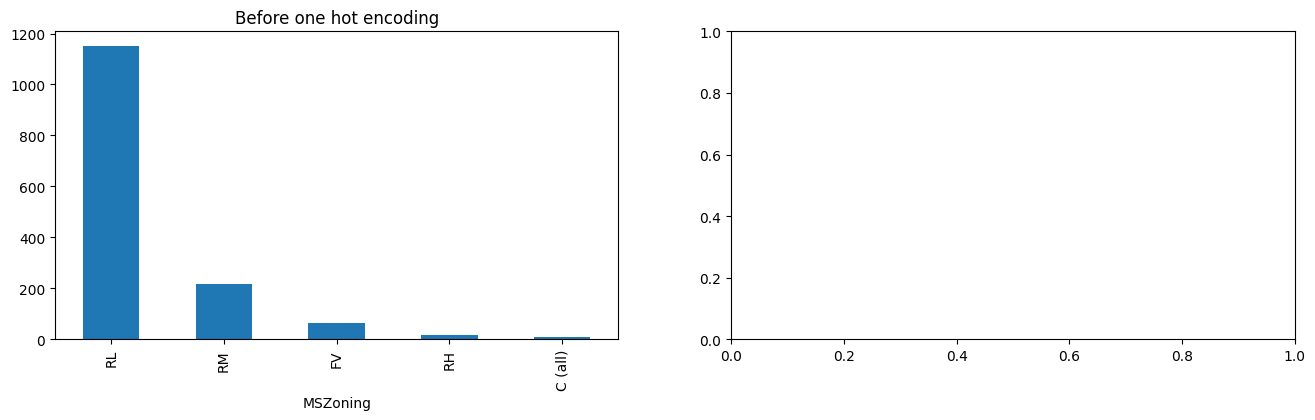

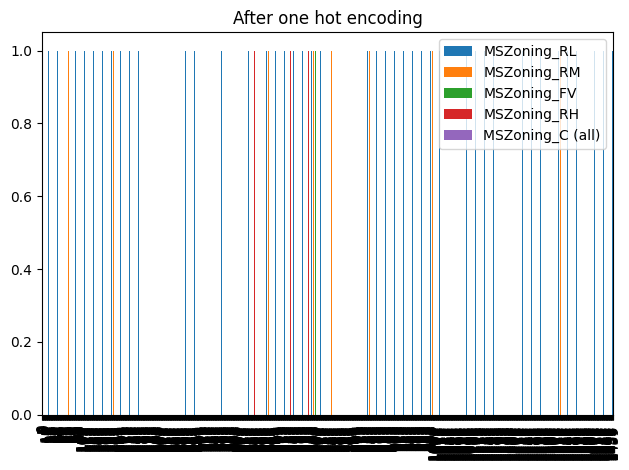

In [9]:
plt.figure(figsize=(16, 4))

# First subplot (left) - Before one-hot encoding
plt.subplot(1, 2, 1)
train_pre['MSZoning'].value_counts().plot(kind='bar', title='Before one hot encoding')

# Second subplot (right) - After one-hot encoding
plt.subplot(1, 2, 2)
df_dummies[['MSZoning_RL', 'MSZoning_RM', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_C (all)']].plot(kind='bar', title='After one hot encoding')

plt.tight_layout()
plt.show()

# 5. Pedict house prices on the dataset

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
print(numerical_val)
print('*' * 40)
print(df_dummies.columns)
print('*' * 40)
print(object_col)

['Id' 'MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr'
 'TotRmsAbvGrd' 'Fireplaces' 'GarageCars' 'GarageArea' 'WoodDeckSF'
 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea'
 'MiscVal' 'MoSold' 'YrSold']
****************************************
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=217)
****************************************
Index(['MSZoning', 'Street', 'LotShape', 'LandConto

In [12]:
train_df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [13]:
train = df_dummies[['YearBuilt', '1stFlrSF', '2ndFlrSF', 'GrLivArea','MSZoning_RL', 'MSZoning_RM', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_C (all)', 'SalePrice']]
X, y = train.drop(columns= "SalePrice"), train["SalePrice"]

reg = LinearRegression().fit(X, y)


In [14]:
scikit_mse = mean_squared_error(reg.predict(X), y)
scikit_r2 = r2_score(reg.predict(X), y)

print(f'MSE (Mean Squared Error):{scikit_mse:.4f}\nR Squared: {scikit_r2:.4f}')

MSE (Mean Squared Error):1984565302.5018
R Squared: 0.5408


In [15]:
train

,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,MSZoning_RL,MSZoning_RM,MSZoning_FV,MSZoning_RH,MSZoning_C (all),SalePrice
0,1.050994,-0.793434,1.161852,0.370333,1,0,0,0,0,208500
1,0.156734,0.257140,-0.795163,-0.482512,1,0,0,0,0,181500
2,0.984752,-0.627826,1.189351,0.515013,1,0,0,0,0,223500
3,-1.863632,-0.521734,0.937276,0.383659,1,0,0,0,0,140000
4,0.951632,-0.045611,1.617877,1.299326,1,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...
1455,0.918511,-0.542435,0.795198,0.250402,1,0,0,0,0,175000
1456,0.222975,2.355701,-0.795163,1.061367,1,0,0,0,0,210000
1457,-1.002492,0.065656,1.844744,1.569647,1,0,0,0,0,266500
1458,-0.704406,-0.218982,-0.795163,-0.832788,1,0,0,0,0,142125


In [16]:
import torch

# Data
features = ['YearBuilt', '1stFlrSF', '2ndFlrSF', 'GrLivArea','MSZoning_RL', 'MSZoning_RM', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_C (all)']
X_tensor = torch.tensor(X[features].values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Model initialization
input_dim = X_tensor.shape[1]
weights = torch.randn(input_dim, 1, dtype=torch.float32, requires_grad=True)
bias = torch.randn(1, dtype=torch.float32, requires_grad=True)

# Hyperparameters
learning_rate = 0.001
num_epochs = 1000

# Training
for epoch in range(num_epochs):
    # Forward pass
    predictions = X_tensor.mm(weights) + bias
    loss = torch.mean((predictions - y_tensor.view(-1, 1))**2)

    # Backward pass using autograd
    loss.backward()

    # Update weights and bias
    with torch.no_grad():
        weights -= learning_rate * weights.grad
        bias -= learning_rate * bias.grad

        # Zero out the gradients
        weights.grad.zero_()
        bias.grad.zero_()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Predictions
predicted = X_tensor.mm(weights).detach().numpy() + bias.detach().numpy()

# Calculate R-squared (R2) score
torch_r2 = r2_score(y, predicted)
print(f'R-squared (R2) Score: {torch_r2:.4f}')

# Calculate the final Mean Squared Error (MSE)
torch_mse = mean_squared_error(y, predicted)
print(f'Final Mean Squared Error (MSE): {torch_mse:.4f}')


Epoch [100/1000], Loss: 20864823296.0000
Epoch [200/1000], Loss: 11753531392.0000
Epoch [300/1000], Loss: 7225969664.0000
Epoch [400/1000], Loss: 4958976000.0000
Epoch [500/1000], Loss: 3810294016.0000
Epoch [600/1000], Loss: 3216925696.0000
Epoch [700/1000], Loss: 2900691456.0000
Epoch [800/1000], Loss: 2723752704.0000
Epoch [900/1000], Loss: 2617597440.0000
Epoch [1000/1000], Loss: 2548046080.0000
R-squared (R2) Score: 0.5961
Final Mean Squared Error (MSE): 2547468754.2369


In [17]:
print(f'scikit-learn package>>>\nMSE (Mean Squared Error):{scikit_mse:.4f}\tR Squared: {scikit_r2:.4f}')
print(f'autograd from pytorch>>>\nMSE (Mean Squared Error):{torch_mse:.4f}\tR Squared: {torch_r2:.4f}')

scikit-learn package>>>
MSE (Mean Squared Error):1984565302.5018	R Squared: 0.5408
autograd from pytorch>>>
MSE (Mean Squared Error):2547468754.2369	R Squared: 0.5961


# 5. Justifying my choice

I selected the following features for my house price prediction model:

1. YearBuilt: The age of a building can significantly impact its price. Newer buildings often have higher prices due to modern amenities and construction standards.
2. 1stFlrSF and 2ndFlrSF: The total square footage of the first and second floors (1stFlrSF and 2ndFlrSF) are crucial indicators of a home's size and living space. Larger living spaces typically command higher prices.
3. GrLivArea: The total above-ground living area (GrLivArea) is a critical factor in determining a home's price. Larger living areas are generally associated with higher prices.
4. MSZoning: The zoning classification (MSZoning) of a property can significantly impact its value. Different zones have specific regulations and restrictions that can affect property values. Understanding the zoning classification can provide valuable insights into the price of a property.

By including these features in my model, I aim to capture both the structural aspects of a property (age and size) and the local zoning regulations that influence property values.

# 6. Compare and discuss the two results that you obtained in Q5. In addition, identify situations where applying gradient descent is more desirable in the context of linear regression.

1. Comparison
- MSE (Result: scikit learn model is better than autograd model)
MSE obtained from the scikit-learn model is slightly better than autograd-based PyTorch model. This tells us that the scikit-learn model had a smaller average squared error.
- R2 (Result: autograd model is better than schikit learn model)
As r2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables, a higher r2 tells us that the autograd model can explain a larger variance

2. Discussion
- For simple linear regression tasks, scikit-learn may be the more convenient choice. However, considering the results above, where there is no clear superiority between the two approaches, the decision between the two should depend on the specific problem you aim to solve and your unique requirements.

3. When to apply gradient descent
- Since gradient descent can work in mini-batches, it is desiralbe when you have a large dataset that doesn't fit in memory
- When you are working on complex models or DL tasks where autograd feature is crucial
- When you need fine-grained contol over the learnig process
- When you want to customize learning rates, weights, and loss functions


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
test_df = pd.read_csv("test.csv")

# Select specific columns
columns_to_select = ['YearBuilt', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'MSZoning']
test_df_set = test_df[columns_to_select].copy()  # Create a copy of the DataFrame

# Select numeric columns for scaling
numeric_columns = test_df_set.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numeric columns
test_df_set[numeric_columns] = scaler.fit_transform(test_df_set[numeric_columns])

# Check if the 'SaleType' column is of object dtype (categorical)
if test_df_set['MSZoning'].dtype == 'object':
    test_dummies = pd.get_dummies(test_df_set['MSZoning'], prefix='MSZoning', dtype=int)
    test_df_set.drop(columns=['MSZoning'], inplace=True)  # Remove the original column
    test_df_set = pd.concat([test_df_set, test_dummies], axis=1)  # Concatenate the dummy variables

test_df_set


,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,-0.340945,-0.654561,-0.775254,-1.215588,0,0,1,0,0
1,-0.439695,0.433298,-0.775254,-0.323539,0,0,0,1,0
2,0.844059,-0.574165,0.891944,0.294508,0,0,0,1,0
3,0.876976,-0.579190,0.837243,0.243004,0,0,0,1,0
4,0.679475,0.310192,-0.775254,-0.424487,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1454,-0.044694,-1.533893,0.523306,-0.811797,0,0,0,0,1
1455,-0.044694,-1.533893,0.523306,-0.811797,0,0,0,0,1
1456,-0.373861,0.169499,-0.775254,-0.539856,0,0,0,1,0
1457,0.679475,-0.468645,-0.775254,-1.063136,0,0,0,1,0


In [19]:
test_df_set = test_df_set[X.columns]

reg.fit(X, y)
pred = reg.predict(test_df_set)

# Create a DataFrame for the predictions
pred_df = pd.DataFrame(pred, columns=['SalePrice'])

# Combine 'Id' with predicted values
result = pd.concat([test_df['Id'], pred_df], axis=1)
result['Id'] = result['Id'].astype(int)

result

result.to_csv('results.csv', index=False)